# DAML 04 - Pandas Exercises - Solutions

Michal Grochmal <michal.grochmal@city.ac.uk>

Exercises rating:

★☆☆ - You should be able to based on Python knowledge plus lecture contents.

★★☆ - You will need to do extra thinking and some extra reading/searching.

★★★ - The answer is difficult to find by a simple search,
      requires you to do a considerable amount of extra work by yourself
      (feel free to ignore these exercises if you're short on time).

We will use the titanic data for this set of exercises, it gives the account of the survivors
from that tragic voyage.  Since the accounts are often incomplete, or the accounts for many could
not even be found, there is a very good deal of missing data, you will need to be careful with that.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('seaborn-talk')
mpl.rcParams['figure.figsize'] = (13, 6)
import pandas as pd
pd.options.display.max_rows = 12
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### 1. Describe general statistics and memory/values for the data frame, what can you evaluate from it (★☆☆)?

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Evaluation:

We have several good columns with complete data.
The `age` column is incomplete but the `adult_male` may help in stats over age.
Information in the `deck` column is not useful since most data is missing.
`embarked` and `embark_town` seem to be a duplicate column, and the same number of points is missing from both.
`pclass` and `class` are also duplicates.
So are `survived` as `alive`.

The columns `alone`, `sibsp` and `parch` are quite mysterious.  A quick look into the original
[kaggle challenge][kaggle] though reveals their purpose:

- sibsp: number of siblings/spouses on board
- parch: number of parents and/or children on board
- alone: true if both `sibsp` and `parch` are empty

`sex` and `who` seem to be different representations of gender but do not get fooled,
if you check the distinct values in each you see that the columns are different.

[kaggle]: https://www.kaggle.com/c/titanic/data

In [4]:
titanic.sex.unique(), titanic.who.unique()

(array(['male', 'female'], dtype=object),
 array(['man', 'woman', 'child'], dtype=object))

### 2. How many and what were the towns where people embarked on the Titanic (★☆☆)?

In [5]:
titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

One can do much more here:
`titanic.embark_town.dropna().unique()` will remove the `nan` from the answer;
and assigning that to a variable then taking `len()` will give you the count.
This can even be done with `titanic.groupby('embark_town').count().iloc[:, 0]`,
which will give us the counts of passengers in each town.
Yet, the `groupby` solution is probably overkill.

### 3. What is the overall survival rate of the people that were on board (★☆☆)?

In [6]:
titanic.survived.mean()

0.3838383838383838

### 4. What is the survival rate depending on the gender?  Use a bar plot to show the difference. (★★☆)

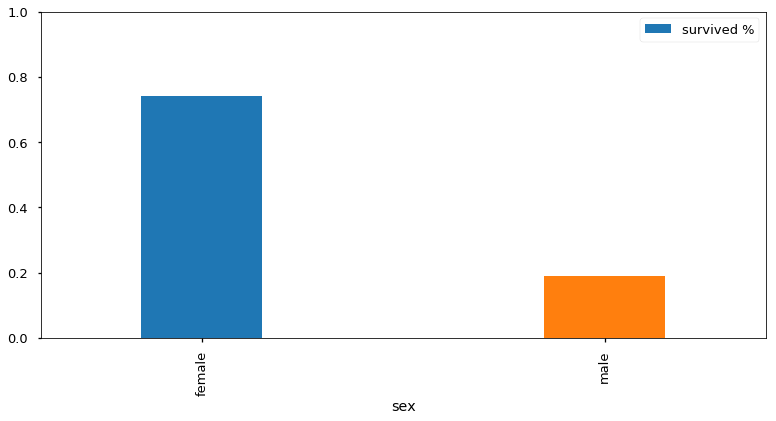

In [7]:
titanic.groupby('sex').mean().plot(y='survived', kind='bar', ylim=(0, 1), width=0.3, label='survived %');

### 5. Is the survival rate different depending on the class in which the person traveled? Use a plot. (★★☆)

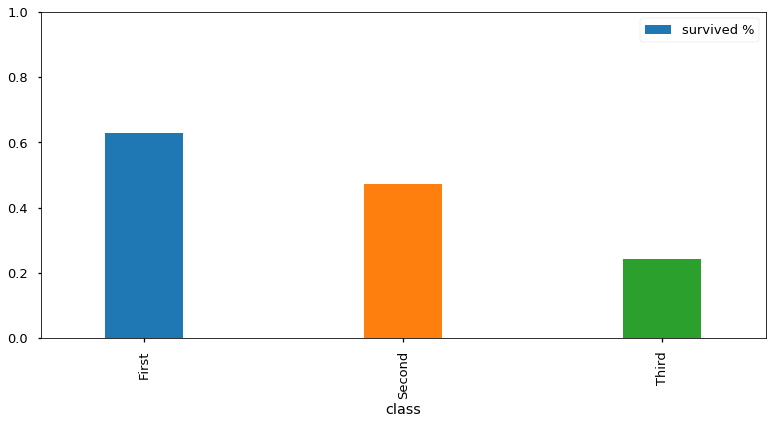

In [8]:
titanic.groupby('class').mean().plot(y='survived', kind='bar', width=0.3, ylim=(0, 1), label='survived %');

### 6. Compare, with a plot, the survival rate according to both: gender and class. (★★☆)

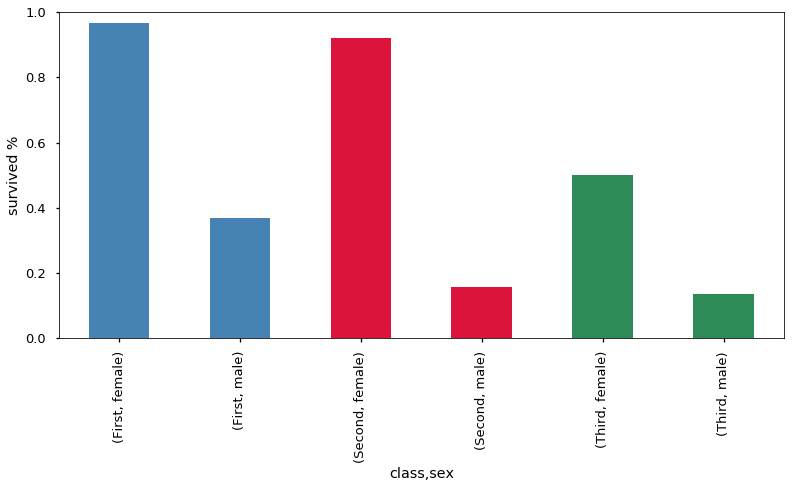

In [9]:
grouped = titanic.groupby(['class', 'sex']).mean()
colors = ['steelblue', 'steelblue', 'crimson', 'crimson', 'seagreen', 'seagreen']
ax = grouped.plot(y='survived', kind='bar', color=colors, width=0.5, legend=False, ylim=(0, 1))
ax.set_ylabel('survived %');

### 7. Is there a relationship between the town in which a passenger embarked onto the Titanic and the class in which he traveled? (★★★)

In [10]:
# a helper to color the bars
import itertools
colors = list(itertools.chain(*[[x]*3 for x in ['steelblue', 'crimson', 'seagreen']]))
colors

['steelblue',
 'steelblue',
 'steelblue',
 'crimson',
 'crimson',
 'crimson',
 'seagreen',
 'seagreen',
 'seagreen']

,person
embark_town,
Cherbourg,168
Queenstown,77
Southampton,644


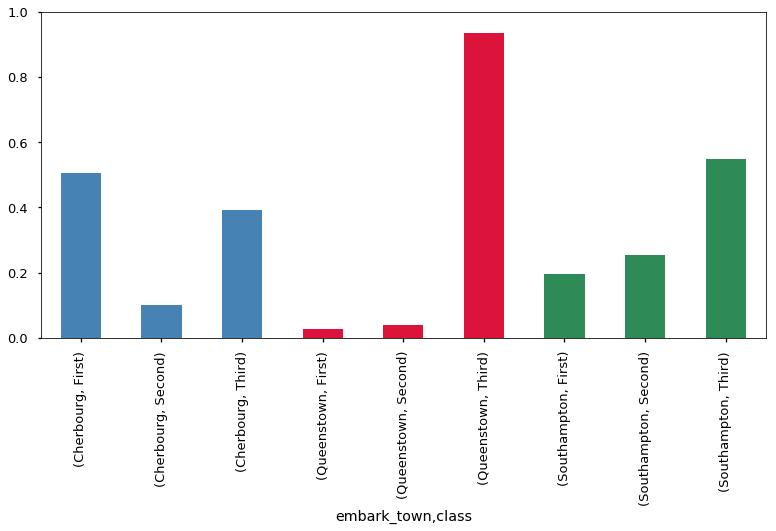

In [11]:
titanic['person'] = 1
town_class = titanic[['embark_town', 'class', 'person']].groupby(['embark_town', 'class'])
passengers_per_town = town_class.count().sum(level=0)
class_by_town = town_class.count() / passengers_per_town
class_by_town.plot(y='person', kind='bar', color=colors, legend=False, ylim=(0, 1))
passengers_per_town

,person
class,
First,214
Second,184
Third,491


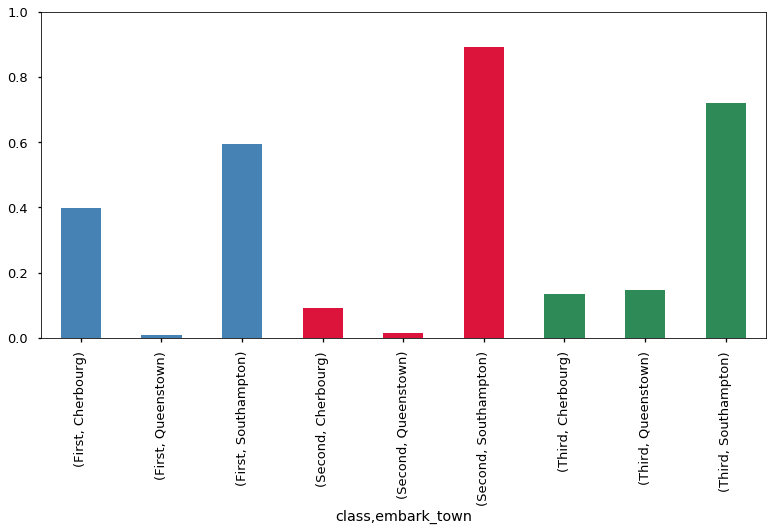

In [12]:
titanic['person'] = 1
town_class = titanic[['embark_town', 'class', 'person']].groupby(['class', 'embark_town'])
passengers_per_class = town_class.count().sum(level=0)
class_by_town = town_class.count() / passengers_per_class
class_by_town.plot(y='person', kind='bar', color=colors, legend=False, ylim=(0, 1))
passengers_per_class